In [1]:
import pandas as pd
from datetime import datetime
import numpy as np
import glob, os
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

In [2]:
cd = os.getcwd()
log_directory = os.path.join(os.sep.join(cd.split(os.path.sep)[:-1]), 'output', 'logs')
log_files = glob.glob(os.path.join(log_directory, "*.csv"))

In [3]:
log_files = glob.glob(os.path.join(log_directory, "*.csv"))
df = pd.concat(pd.read_csv(file, sep = ';') for file in log_files)
df_app_ids = pd.DataFrame(df.drop_duplicates('App ID').reset_index (drop = True)[['App ID', 'App Name']])

In [4]:
group_by = df.loc[(df['Name'] == 'APPLICATION START') | (df['Name'] == 'APPLICATION END')].groupby('App ID')
execution_times = pd.DataFrame(group_by.agg({'Datetime': lambda x: list(x)})).reset_index(drop=False)
execution_times['Start'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[0], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['End'] = execution_times['Datetime'].map(lambda x: datetime.strptime(x[1], '%Y-%m-%d %H:%M:%S.%f'))
execution_times['Total app execution time (s)'] = (execution_times['End'] - execution_times['Start']).apply(lambda x: x.total_seconds())
execution_times = execution_times[['App ID', 'Total app execution time (s)']]
execution_times = pd.merge(df_app_ids, execution_times).rename(columns = {'Datetime': 'Total app execution time (s)'})

In [5]:
execution_times['Size percentage'] = execution_times['App Name'].map(lambda x: int((x.split('_')[-2] + '0')[0:3]))
execution_times['Transformation'] = execution_times['App Name'].map(lambda x: x.split('_')[0])

### 1. Transformation = map / filter / union

In [6]:
map_execution_times = execution_times.loc[execution_times['Transformation'] == 'map']
filter_execution_times = execution_times.loc[execution_times['Transformation'] == 'filter']
union_execution_times = execution_times.loc[execution_times['Transformation'] == 'union']
groupbykey_execution_times = execution_times.loc[(execution_times['Transformation'] == 'groupByKey') & (execution_times['App Name'].str.contains('app'))]
reducebykey_execution_times = execution_times.loc[(execution_times['Transformation'] == 'reduceByKey') & (execution_times['App Name'].str.contains('app'))]
distinct_execution_times = execution_times.loc[execution_times['Transformation'] == 'distinct']

In [7]:
groupbykey_execution_times

,App ID,App Name,Total app execution time (s),Size percentage,Transformation
16,app-20230803155939-0551,groupByKey_app_narrow_transf_gsod_sample_049_1...,176.463,49,groupByKey
27,app-20230804084930-0631,groupByKey_app_narrow_transf_gsod_sample_004_1...,32.717,4,groupByKey
42,app-20230803163048-0561,groupByKey_app_narrow_transf_gsod_sample_055_1...,194.179,55,groupByKey
44,app-20230803203816-0604,groupByKey_app_narrow_transf_gsod_sample_077_1...,255.856,77,groupByKey
70,app-20230803140012-0497,groupByKey_app_narrow_transf_gsod_sample_022_1...,86.939,22,groupByKey
...,...,...,...,...,...
1231,app-20230804084820-0629,groupByKey_app_narrow_transf_gsod_sample_003_1...,31.934,3,groupByKey
1260,app-20230803140615-0501,groupByKey_app_narrow_transf_gsod_sample_024_1...,87.542,24,groupByKey
1278,app-20230803204700-0606,groupByKey_app_narrow_transf_gsod_sample_078_1...,253.941,78,groupByKey
1283,app-20230803140919-0503,groupByKey_app_narrow_transf_gsod_sample_025_1...,91.065,25,groupByKey


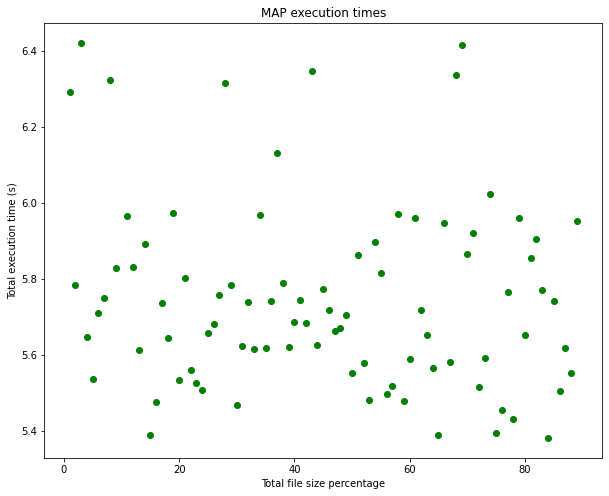

In [8]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = map_execution_times['Size percentage']
# corresponding y axis values
y = map_execution_times['Total app execution time (s)']
np_map = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('MAP execution times')

# function to show the plot
plt.show()


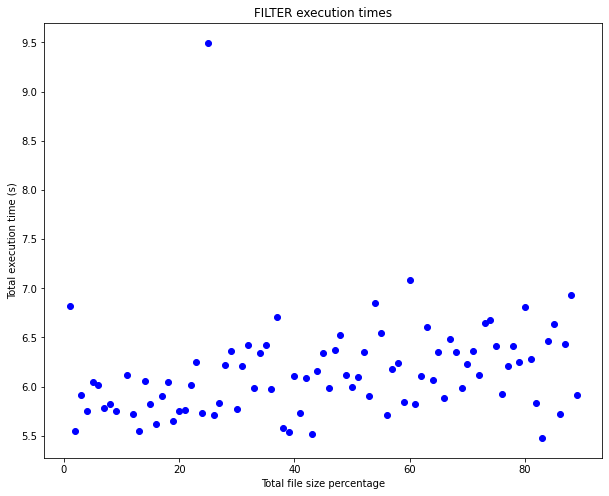

In [9]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = filter_execution_times['Size percentage']
# corresponding y axis values
y = filter_execution_times['Total app execution time (s)']
np_filter = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'blue')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('FILTER execution times')

# function to show the plot
plt.show()


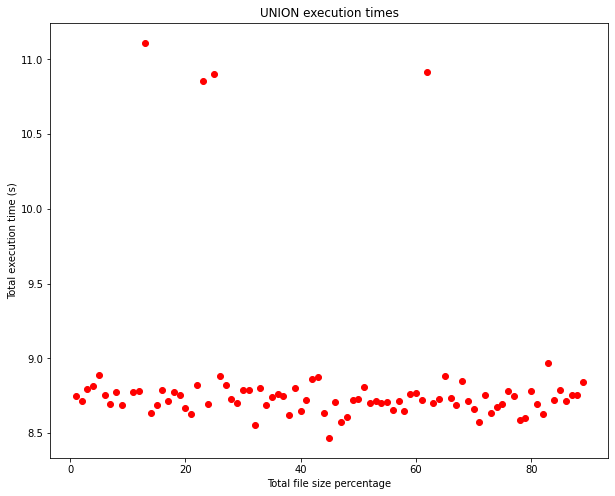

In [10]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x = union_execution_times['Size percentage']
# corresponding y axis values
y = union_execution_times['Total app execution time (s)']
np_union = y.to_numpy()

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'red')
# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('UNION execution times')

# function to show the plot
plt.show()


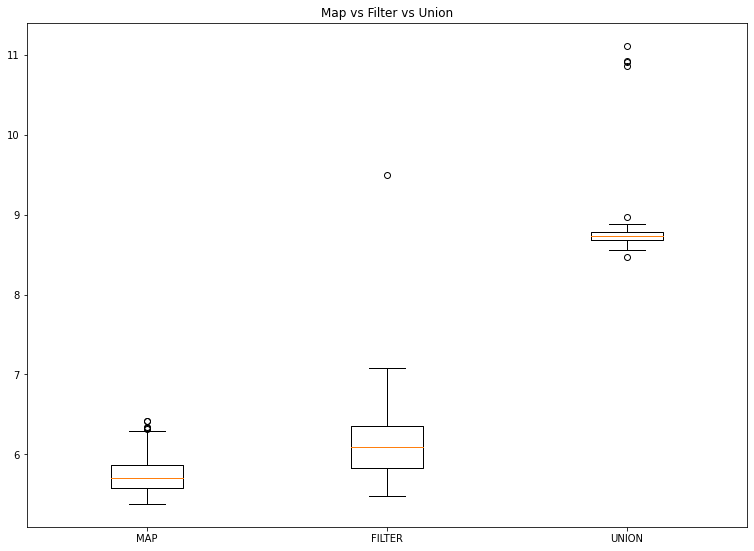

In [11]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
 
# Creating dataset
np.random.seed(10)
 
data = [np_map, np_filter, np_union]
 
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0,1,1])
 
# Creating plot
bp = ax.boxplot(data)

# x-axis labels
ax.set_xticklabels(['MAP', 'FILTER','UNION'])
 
# Adding title
plt.title("Map vs Filter vs Union")
 
# show plot
plt.show()

----

### 2. Transformation = distinct / groupbykey / reducebykey

In [12]:
x = distinct_execution_times['Size percentage']
y = distinct_execution_times['Total app execution time (s)']

In [13]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = x.array.reshape(-1,1), y = y)


# Información del modelo
# ==============================================================================
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)

print('==============================================================================')

print("Coeficiente de determinación R^2:", modelo.score(x.array.reshape(-1,1), y))

# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = x, y =  y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Pendiente: 13.785374175452716
Coeficiente: 3.2562717505069214
Coeficiente de determinación R^2: 0.9859694751589642
Coeficiente de correlación de Pearson:  0.9929599564730515
P-value:  1.547362340016272e-80


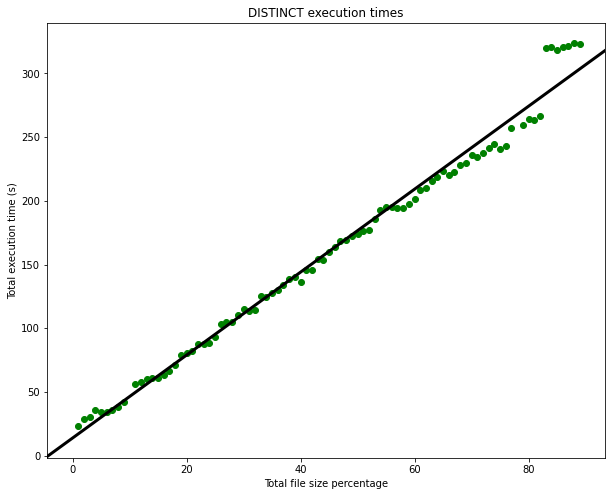

In [14]:
# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'green')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)


# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('DISTINCT execution times')

# function to show the plot
plt.show()

In [15]:
x = groupbykey_execution_times['Size percentage']
y = groupbykey_execution_times['Total app execution time (s)']

In [16]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = x.array.reshape(-1,1), y = y)


# Información del modelo
# ==============================================================================
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)

print('==============================================================================')

print("Coeficiente de determinación R^2:", modelo.score(x.array.reshape(-1,1), y))

# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = x, y =  y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Pendiente: 14.530383678394827
Coeficiente: 3.266702233557721
Coeficiente de determinación R^2: 0.9866099577194375
Coeficiente de correlación de Pearson:  0.9932824158915919
P-value:  5.671529797787954e-88


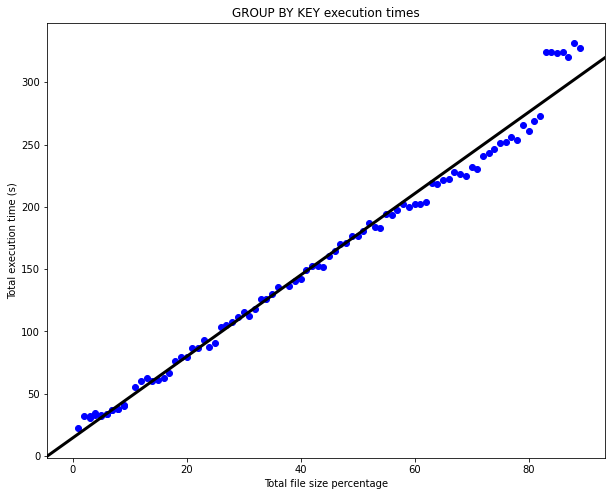

In [17]:
# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'blue')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('GROUP BY KEY execution times')

# function to show the plot
plt.show()

In [18]:
x = reducebykey_execution_times['Size percentage']
y = reducebykey_execution_times['Total app execution time (s)']

In [19]:
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()
modelo.fit(X = x.array.reshape(-1,1), y = y)


# Información del modelo
# ==============================================================================
print("Pendiente:", modelo.coef_.flatten()[0])
print("Coeficiente:", modelo.intercept_)

print('==============================================================================')

print("Coeficiente de determinación R^2:", modelo.score(x.array.reshape(-1,1), y))

# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = x, y =  y)
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Pendiente: 14.462472334719195
Coeficiente: 3.2451409780038833
Coeficiente de determinación R^2: 0.9899399510601489
Coeficiente de correlación de Pearson:  0.9949572609213669
P-value:  1.0954299910720314e-94


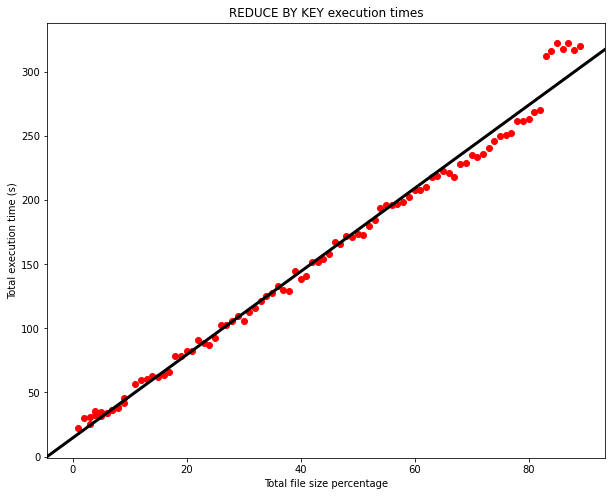

In [20]:
# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x, y, marker = 'o', color = 'red')
plt.axline((0,modelo.intercept_), slope=modelo.coef_.flatten()[0], color='black', linewidth=3)

# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times')

# function to show the plot
plt.show()

----------

### 3. GroupByKey vs ReduceByKey

In [21]:
execution_times['Group'] = execution_times['App Name'].map(lambda x: x.split('_')[1])
groupbykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'GroupByKey']
groupbykey_execution_times_1 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '1']
groupbykey_execution_times_2 =  groupbykey_execution_times.loc[groupbykey_execution_times['Group'] == '2']
reducebykey_execution_times = execution_times.loc[execution_times['Transformation'] == 'ReduceByKey']
reducebykey_execution_times_1 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '1']
reducebykey_execution_times_2 =  reducebykey_execution_times.loc[reducebykey_execution_times['Group'] == '2']

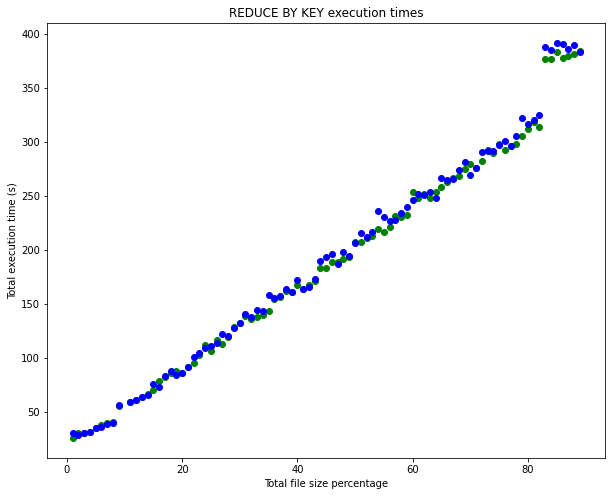

In [22]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = groupbykey_execution_times_1['Size percentage']
# corresponding y axis values
y_1 = groupbykey_execution_times_1['Total app execution time (s)']
x_2 = reducebykey_execution_times_1['Size percentage']
# corresponding y axis values
y_2 = reducebykey_execution_times_1['Total app execution time (s)']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')


# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times')

# function to show the plot
plt.show()

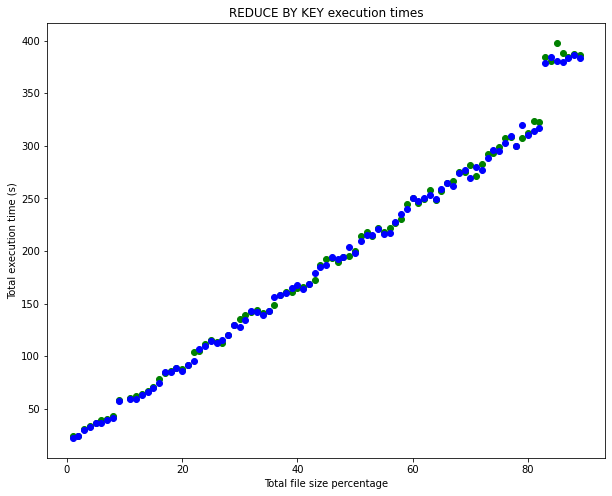

In [23]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = groupbykey_execution_times_2['Size percentage']
# corresponding y axis values
y_1 = groupbykey_execution_times_2['Total app execution time (s)']
x_2 = reducebykey_execution_times_2['Size percentage']
# corresponding y axis values
y_2 = reducebykey_execution_times_2['Total app execution time (s)']

# plotting the points
plt.figure(figsize=(10,8))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')


# naming the x axis
plt.xlabel('Total file size percentage')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times')

# function to show the plot
plt.show()

In [24]:
df['Size percentage'] = df['App Name'].map(lambda x: int(x.split('_')[-2]))
df['Transformation'] = df['App Name'].map(lambda x: x.split('_')[0])

In [25]:
df_example = df.loc[(df['Transformation'] == 'GroupByKey') | (df['Transformation'] == 'ReduceByKey')]
df_example = df_example.loc[(df_example['SHUFFLER: Total Records Read'] != '-') | (df_example['SHUFFLEW: Shuffle Records Written'] != '-')]
group_by = df_example.groupby(['App ID', 'Size percentage', 'App Name'])
group_by = pd.DataFrame(group_by.agg({'SHUFFLER: Total Records Read': lambda x: list(x), 'SHUFFLEW: Shuffle Records Written': lambda x: list(x)})).reset_index(drop=False)
group_by['SHUFFLER: Total Records Read'] = group_by['SHUFFLER: Total Records Read'].map(lambda x: [int(elem) for elem in x if elem != '0'])
group_by['SHUFFLEW: Shuffle Records Written'] = group_by['SHUFFLEW: Shuffle Records Written'].map(lambda x: [int(elem) for elem in x if elem != '0'])
group_by['Total_Read'] = group_by['SHUFFLER: Total Records Read'].map(lambda x: sum(x))
group_by['Total_Write'] = group_by['SHUFFLEW: Shuffle Records Written'].map(lambda x: sum(x))

In [26]:
group_by

,App ID,Size percentage,App Name,SHUFFLER: Total Records Read,SHUFFLEW: Shuffle Records Written,Total_Read,Total_Write
0,app-20230829072214-0281,1,GroupByKey_1_app_narrow_transf_gsod_sample_001...,"[45, 45, 45]","[45, 45, 45]",135,135
1,app-20230829072241-0282,1,ReduceByKey_1_app_narrow_transf_gsod_sample_00...,"[45, 45, 45]","[45, 45, 45]",135,135
2,app-20230829072313-0283,1,GroupByKey_2_app_narrow_transf_gsod_sample_001...,"[45, 45, 45]","[45, 45, 45]",135,135
3,app-20230829072338-0284,1,ReduceByKey_2_app_narrow_transf_gsod_sample_00...,"[45, 45, 45]","[45, 45, 45]",135,135
4,app-20230829072402-0285,2,GroupByKey_1_app_narrow_transf_gsod_sample_002...,"[66, 78, 78, 68, 67, 78]","[73, 68, 76, 75, 73, 70]",435,435
...,...,...,...,...,...,...,...
347,app-20230830015519-0628,89,ReduceByKey_2_app_narrow_transf_gsod_sample_08...,"[175, 193, 592, 124, 591, 162, 129, 196, 583, ...","[234, 309, 341, 361, 320, 391, 442, 355, 482, ...",116952,116952
348,app-20230830020150-0629,8,GroupByKey_1_app_narrow_transf_gsod_sample_08_...,"[1202, 1195, 1202, 1180, 1205, 1201, 1200, 119...","[1212, 1116, 1215, 1214, 1211, 1211, 1213, 116...",291222,291222
349,app-20230830020708-0630,8,ReduceByKey_1_app_narrow_transf_gsod_sample_08...,"[1200, 1201, 1198, 1201, 1202, 1191, 1180, 120...","[1212, 1116, 1214, 1215, 1169, 1213, 1211, 121...",291222,291222
350,app-20230830021231-0631,8,GroupByKey_2_app_narrow_transf_gsod_sample_08_...,"[1202, 1180, 1198, 1201, 1201, 1200, 1205, 120...","[1116, 1212, 1214, 1215, 1211, 1213, 1169, 121...",291222,291222


In [27]:
var_partitions = execution_times.loc[execution_times['App Name'].str.contains('var_partitions')]
var_partitions['Partitions'] = var_partitions['App Name'].map(lambda x: x.split('_')[3])
var_partitions = var_partitions.sort_values(by = ['App ID', 'Partitions'])

<ipython-input-27-a0928650dd1d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  var_partitions['Partitions'] = var_partitions['App Name'].map(lambda x: x.split('_')[3])


In [28]:
example_1 = var_partitions.loc[var_partitions['Size percentage'] == 1]
example_2 = var_partitions.loc[var_partitions['Size percentage'] == 2]
example_3 = var_partitions.loc[var_partitions['Size percentage'] == 3]
example_4 = var_partitions.loc[var_partitions['Size percentage'] == 4]
example_5 = var_partitions.loc[var_partitions['Size percentage'] == 5]
example_6 = var_partitions.loc[var_partitions['Size percentage'] == 6]
example_7 = var_partitions.loc[var_partitions['Size percentage'] == 7]
example_8 = var_partitions.loc[var_partitions['Size percentage'] == 8]
example_9 = var_partitions.loc[var_partitions['Size percentage'] == 9]

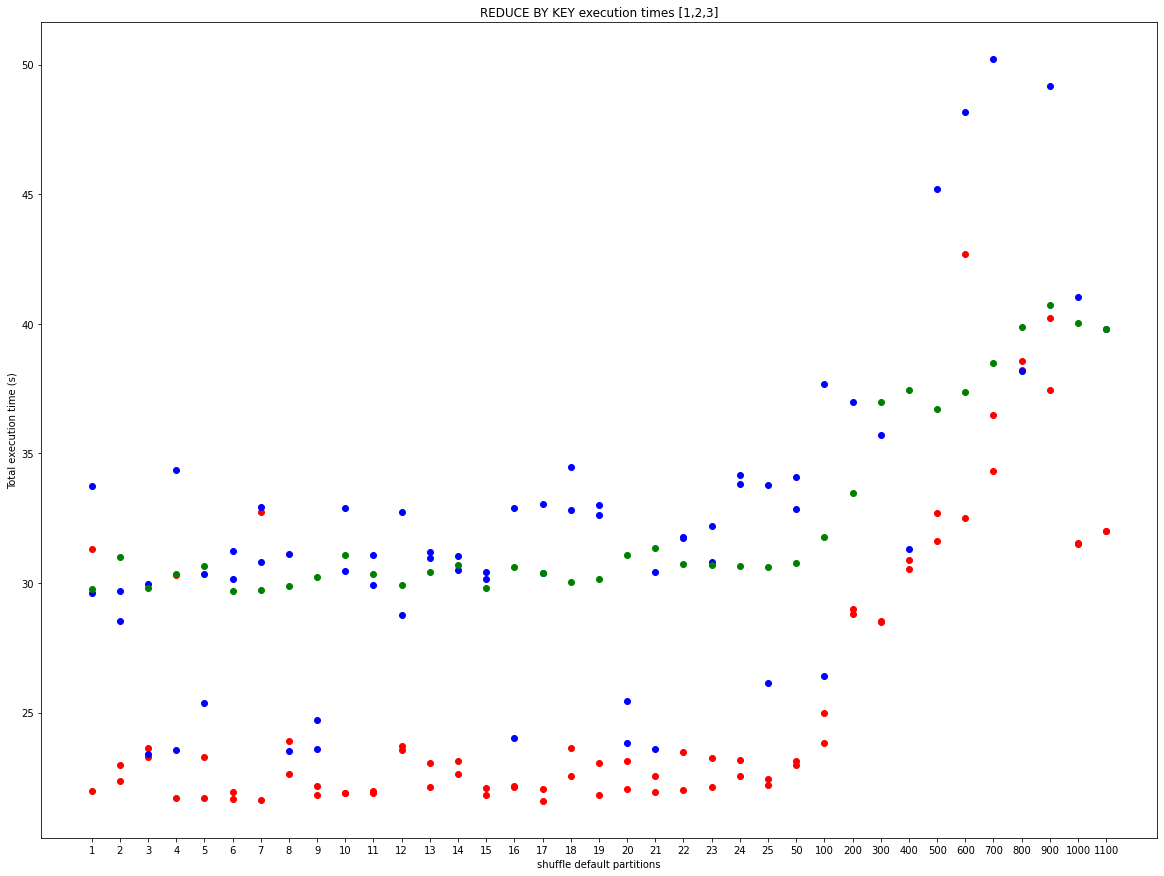

In [29]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = example_1['Partitions']
# corresponding y axis values
y_1 = example_1['Total app execution time (s)']
# x axis values
x_2 = example_2['Partitions']
# corresponding y axis values
y_2 = example_2['Total app execution time (s)']
# x axis values
x_3 = example_3['Partitions']
# corresponding y axis values
y_3 = example_3['Total app execution time (s)']


# plotting the points
plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'red')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')
plt.scatter(x_3, y_3, marker = 'o', color = 'green')



# naming the x axis
plt.xlabel('shuffle default partitions')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times [1,2,3]')

# function to show the plot
plt.show()

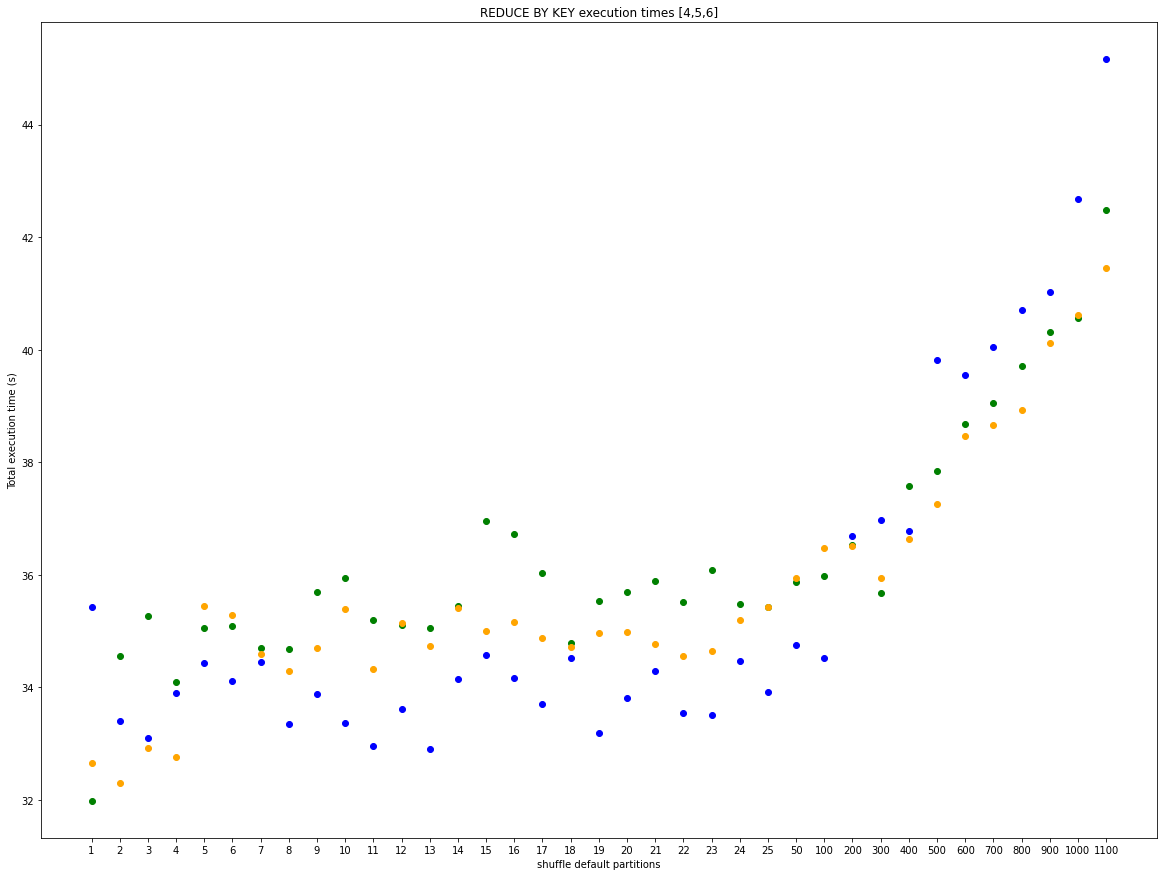

In [30]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = example_4['Partitions']
# corresponding y axis values
y_1 = example_4['Total app execution time (s)']
# x axis values
x_2 = example_5['Partitions']
# corresponding y axis values
y_2 = example_5['Total app execution time (s)']
# x axis values
x_3 = example_6['Partitions']
# corresponding y axis values
y_3 = example_6['Total app execution time (s)']


# plotting the points
plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'green')
plt.scatter(x_2, y_2, marker = 'o', color = 'orange')
plt.scatter(x_3, y_3, marker = 'o', color = 'blue')


# naming the x axis
plt.xlabel('shuffle default partitions')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times [4,5,6]')

# function to show the plot
plt.show()

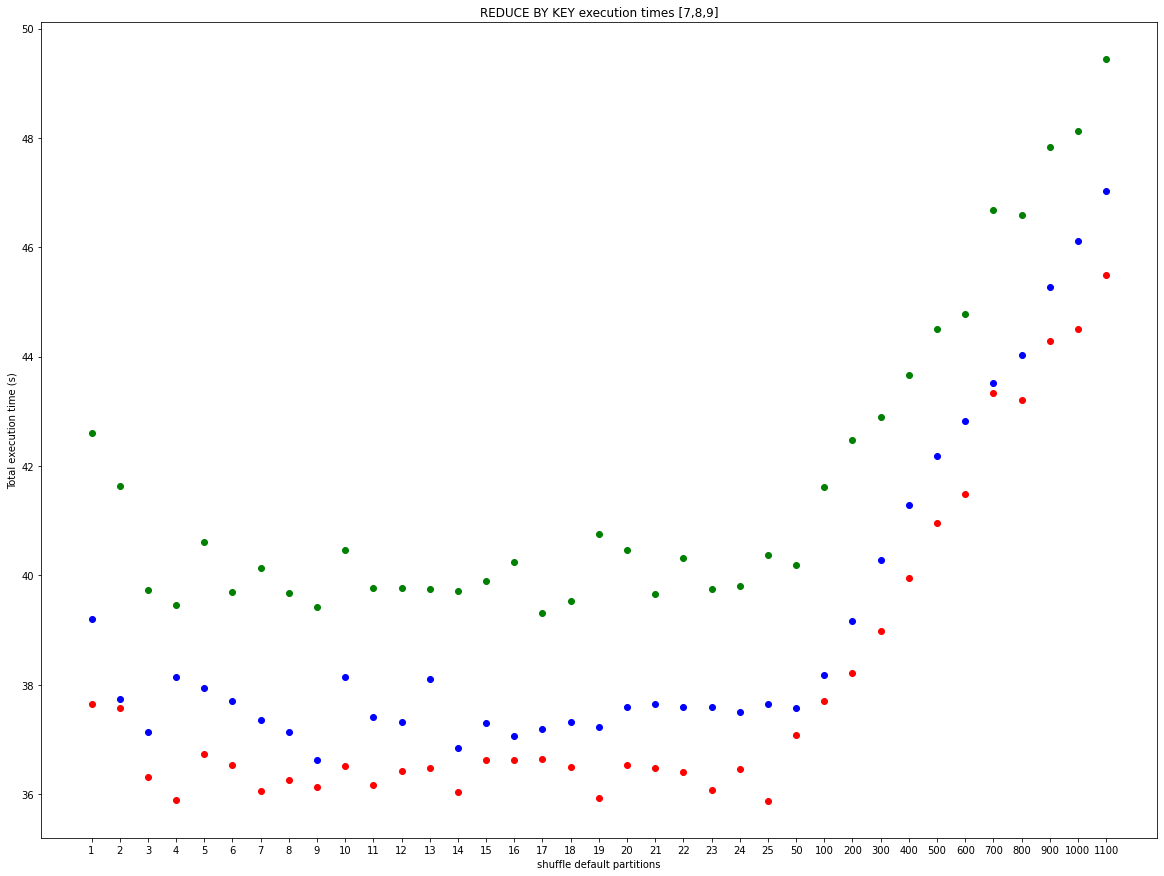

In [31]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = example_7['Partitions']
# corresponding y axis values
y_1 = example_7['Total app execution time (s)']
# x axis values
x_2 = example_8['Partitions']
# corresponding y axis values
y_2 = example_8['Total app execution time (s)']
# x axis values
x_3 = example_9['Partitions']
# corresponding y axis values
y_3 = example_9['Total app execution time (s)']



# plotting the points
plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'red')
plt.scatter(x_2, y_2, marker = 'o', color = 'blue')
plt.scatter(x_3, y_3, marker = 'o', color = 'green')



# naming the x axis
plt.xlabel('shuffle default partitions')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times [7,8,9]')

# function to show the plot
plt.show()

In [32]:
example_10 = var_partitions.loc[var_partitions['Size percentage'] == 10]
example_11 = var_partitions.loc[var_partitions['Size percentage'] == 11]
example_12 = var_partitions.loc[var_partitions['Size percentage'] == 12]

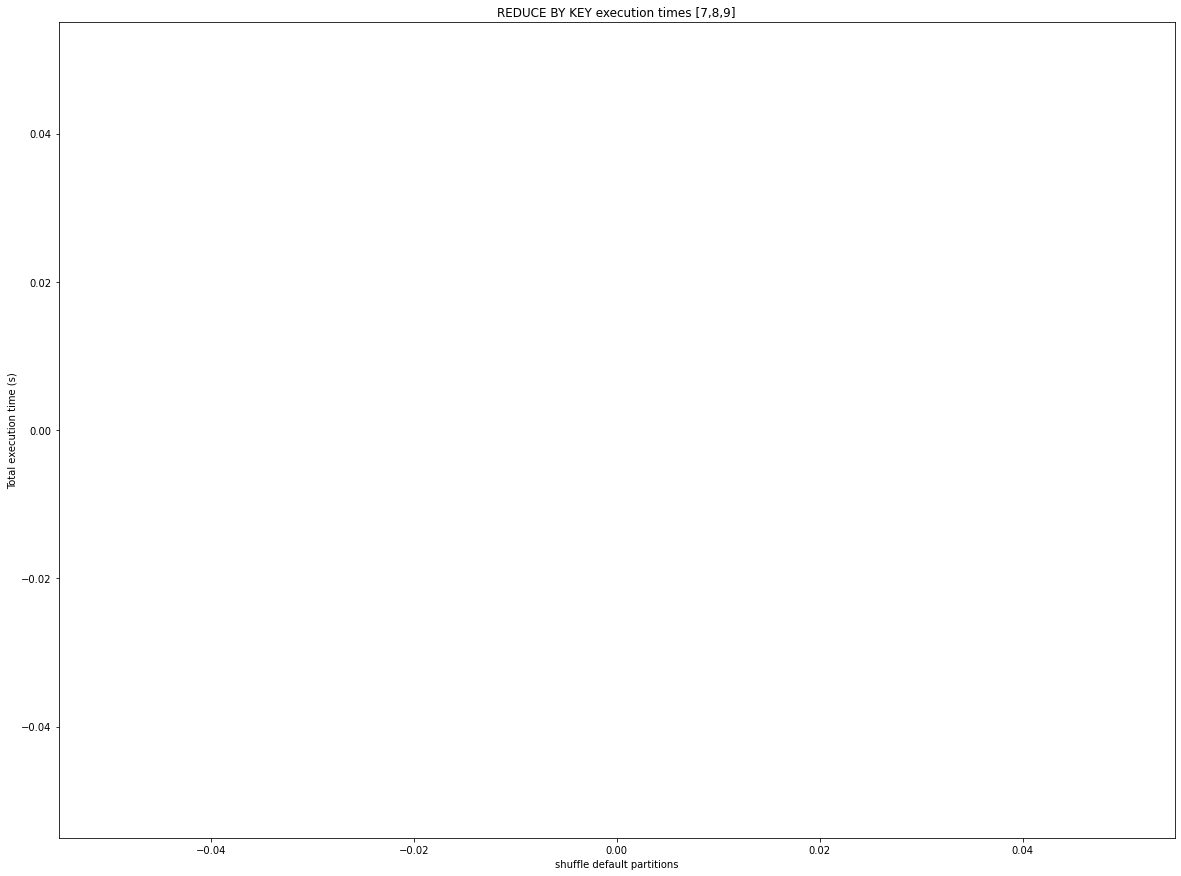

In [33]:
# importing the required module
import matplotlib.pyplot as plt

# x axis values
x_1 = example_10['Partitions']
# corresponding y axis values
y_1 = example_10['Total app execution time (s)']
# x axis values
x_2 = example_11['Partitions']
# corresponding y axis values
y_2 = example_11['Total app execution time (s)']
# x axis values
x_3 = example_12['Partitions']
# corresponding y axis values
y_3 = example_12['Total app execution time (s)']



# plotting the points
plt.figure(figsize=(20,15))
plt.scatter(x_1, y_1, marker = 'o', color = 'purple')
plt.scatter(x_2, y_2, marker = 'o', color = 'orange')
plt.scatter(x_3, y_3, marker = 'o', color = 'black')



# naming the x axis
plt.xlabel('shuffle default partitions')
# naming the y axis
plt.ylabel('Total execution time (s)')

# giving a title to my graph
plt.title('REDUCE BY KEY execution times [7,8,9]')

# function to show the plot
plt.show()